## Column_stack

### №1

In [1]:
import numpy as np
import pandas as pd

np.random.seed(123)

t = np.arange(1, 41)  # 40 недель

y = (
    5
    + 0.15 * t
    + 1.8 * np.sin(2 * np.pi * t / 10)
    + np.random.normal(0, 0.5, size=len(t))
)

df = pd.DataFrame({
    "week": t,
    "activity_time": y
})

In [2]:
df.head()

,week,activity_time
0,1,5.665198
1,2,7.510574
2,3,7.303391
3,4,5.904866
4,5,5.460700


In [3]:
df['sin'] = df['week'].apply(lambda x: np.sin((2 * np.pi * x) / 10))

In [4]:
y = df['activity_time']

In [6]:
trird = [np.sin((2 * np.pi * i) / 10) for i in range(1, 41)]

In [7]:
X = np.column_stack([np.ones(len(df)), df['week'].to_list(), trird])
params = np.linalg.lstsq(X, y, rcond=None)[0]

In [8]:
params

array([5.07900103, 0.14411262, 1.64177096])

In [9]:
res = X @ params

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
mean_squared_error(res, y)
r2_score(res, y)

0.9038281343930167

In [13]:
import matplotlib.pyplot as plt

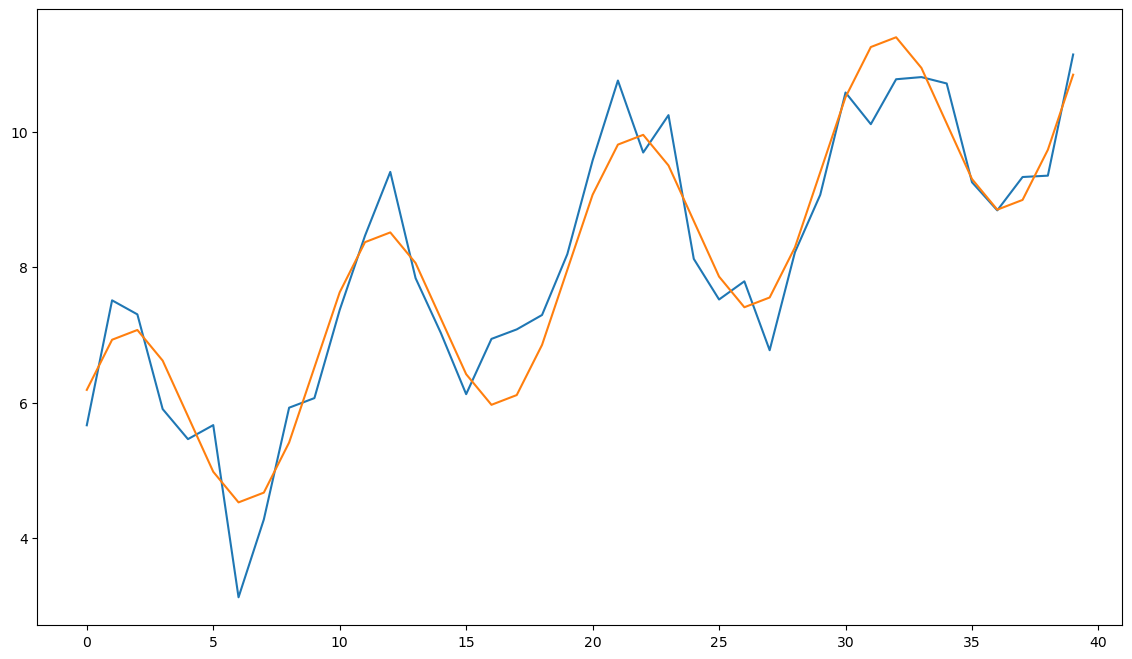

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(y)
plt.plot(res)

### №2

In [15]:
import numpy as np
import pandas as pd

np.random.seed(1)

t = np.arange(1, 61)

y = (
    12
    + 0.08 * t
    + 2.5 * np.sin(2 * np.pi * t / 14)
    + np.random.normal(0, 0.6, size=len(t))
)

df = pd.DataFrame({
    "day": t,
    "load": y
})

In [16]:
df.head()

,day,load
0,1,14.139317
1,2,13.747525
2,3,14.360417
3,4,14.113539
4,5,14.873823


In [17]:
lst_sin = [np.sin((2 * np.pi * i) / 14) for i in range(1, 61)]

In [18]:
y = df['load']
X = np.column_stack([np.ones(len(df)), df['day'].to_list(), lst_sin])

In [19]:
params = np.linalg.lstsq(X, y, rcond=None)[0]

In [20]:
res = X @ params

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y, res)

0.943419874597571

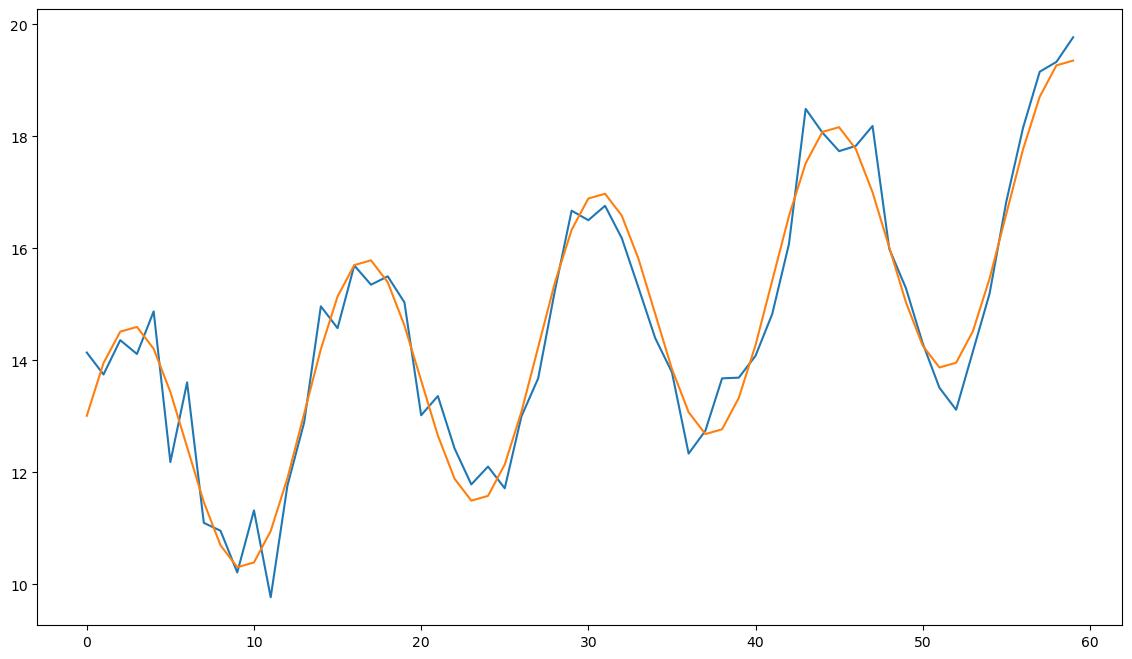

In [23]:
plt.figure(figsize=(14, 8))
plt.plot(y)
plt.plot(res)

### №3

In [24]:
import numpy as np
import pandas as pd

np.random.seed(10)

n = 120

t = np.linspace(0, 10, n)
P = np.random.uniform(1, 5, n)

a_true = 2.5
b_true = 0.8
c_true = 1.4

y = a_true + b_true * t + c_true * P \
    + np.random.normal(0, 0.4, size=n)

df = pd.DataFrame({
    "time": t,
    "power": P,
    "temperature": y
})

In [26]:
df

,time,power,temperature
0,0.000000,4.085283,8.502128
1,0.084034,1.083008,3.768530
2,0.168067,3.534593,7.700060
3,0.252101,3.995216,8.106660
4,0.336134,2.994028,7.922277
...,...,...,...
115,9.663866,2.351264,12.909634
116,9.747899,1.432255,12.363061
117,9.831933,1.715611,12.893446
118,9.915966,4.543308,16.563438


In [41]:
y = df['temperature']
X = np.column_stack([np.ones(len(df)), df['time'], df['power']])
params = np.linalg.lstsq(X, y, rcond=None)[0]

In [42]:
params

array([2.46823192, 0.78966964, 1.43565808])

In [43]:
res = X @ params

In [44]:
r2_score(res, y)

0.978340536802773

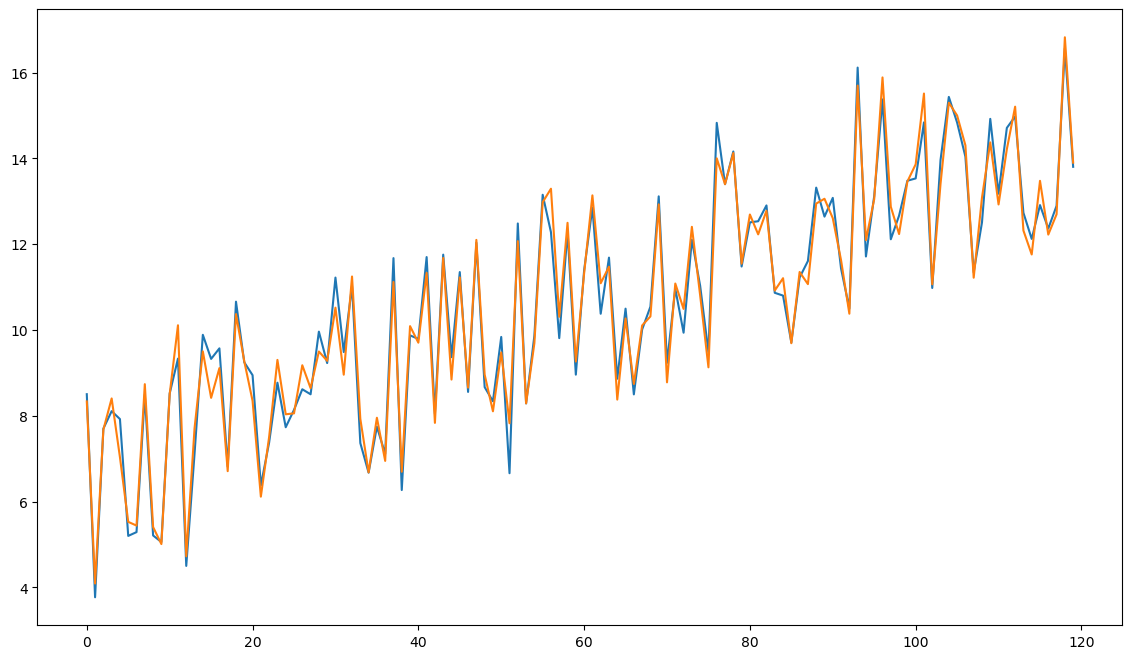

In [45]:
plt.figure(figsize=(14, 8))
plt.plot(y)
plt.plot(res)

# Нелинейная по параметрам модель

## Curve_fit

In [25]:
from scipy.optimize import curve_fit
import numpy as np

### №1

In [43]:
np.random.seed(3)

t = np.linspace(0, 10, 50)

y = (
    8 * np.exp(-0.35 * t)
    + np.random.normal(0, 0.2, size=len(t))
)

df = pd.DataFrame({
    "time": t,
    "signal": y
})


In [54]:
df.head()

,time,signal
0,0.000000,8.357726
1,0.204082,7.535804
2,0.408163,6.954323
3,0.612245,6.084243
4,0.816327,5.956341


In [ ]:
def model(x, A, omega):
    return A * np.sin(omega * x)

params, _ = curve_fit(
    model,
    x,
    y,
    p0=[1, 1],
    bounds=([0, 0], [10, 5])
)

A, omega = params
y_pred = model(x, A, omega)

In [46]:
def model(t, A, k):
    return A * np.e ** (-k*t)

In [49]:
from scipy.optimize import curve_fit

params, _ = curve_fit(
    model,
    df['time'],
    df['signal'],
    p0=[1, 1],
    bounds=([0, 0], [10, 5])
)

In [51]:
A, k = params

In [57]:
k

0.36254727643760026

In [52]:
res = model(df['time'], A, k)

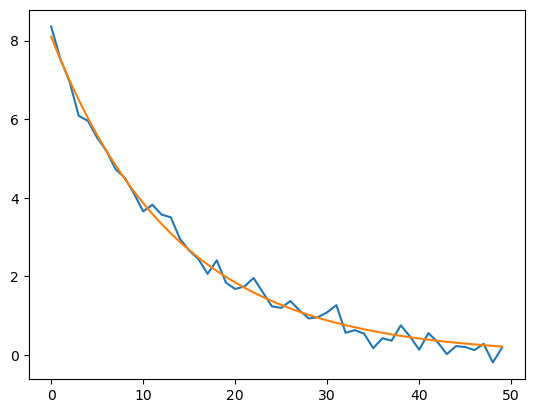

In [55]:
plt.plot(y)
plt.plot(res)

In [56]:
r2_score(res, y)

0.9912917366705746

### №2

In [59]:
import numpy as np
import pandas as pd

np.random.seed(7)

t = np.linspace(0, 15, 120)

true_params = {
    "A": 6.0,
    "k": 0.28,
    "omega": 1.7,
    "phi": 0.6,
    "C": 1.2
}

y = (
    true_params["A"]
    * np.exp(-true_params["k"] * t)
    * np.sin(true_params["omega"] * t + true_params["phi"])
    + true_params["C"]
    + np.random.normal(0, 0.25, size=len(t))
)

df = pd.DataFrame({
    "time": t,
    "signal": y
})


In [60]:
df

,time,signal
0,0.000000,5.010486
1,0.126050,5.295612
2,0.252101,5.997309
3,0.378151,6.411436
4,0.504202,6.179173
...,...,...
115,14.495798,1.257112
116,14.621849,1.237443
117,14.747899,1.142266
118,14.873950,1.101709


In [61]:
def model(t, A, k, w, f, C):
    return A * np.e ** (-k*t) * np.sin(w*t + f) + C 

In [62]:
params, _ = curve_fit(model, df['time'], df['signal'])

In [63]:
params

array([6.01012275, 0.28859683, 1.69248237, 0.62069399, 1.20763832])

In [64]:
res = model(df['time'], params[0], params[1], params[2], params[3], params[4])

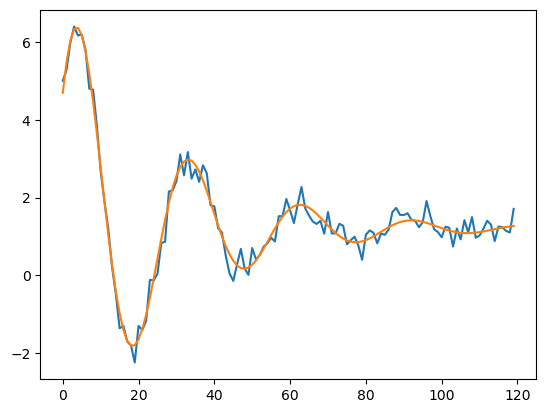

In [65]:
plt.plot(df['signal'])
plt.plot(res)

### №3 (Несколько известных параметров нелинейной модели)

In [67]:
import numpy as np
import pandas as pd

np.random.seed(11)

n = 120

t = np.random.uniform(0, 8, n)
r = np.random.uniform(1, 5, n)

true = {
    "A": 15,
    "k": 0.42,
    "C": 0.8
}

y = (
    true["A"] * np.exp(-true["k"] * t) / (r ** 2)
    + true["C"]
    + np.random.normal(0, 0.3, size=n)
)

df = pd.DataFrame({
    "time": t,
    "distance": r,
    "signal": y
})


In [68]:
df

,time,distance,signal
0,1.442158,3.076031,1.615820
1,0.155802,4.689801,1.546908
2,3.705748,3.895645,1.487859
3,5.799471,2.975652,1.459396
4,3.361629,2.989985,0.732009
...,...,...,...
115,6.605218,4.801645,0.286022
116,4.269552,4.532027,0.695097
117,7.288973,4.762836,0.529646
118,3.324029,4.035560,0.683059


In [86]:
def model(x, A, k, C):
    t, r = x
    return A * np.e ** (-k*t) * 1/r**2 + C

In [88]:
xdata = (df['time'].to_numpy(), df['distance'].to_numpy())

In [89]:
params, _ = curve_fit(model, xdata, df['signal'])

In [90]:
params

array([14.85369504,  0.42525814,  0.80196197])

In [91]:
res = model(xdata, params[0], params[1], params[2])

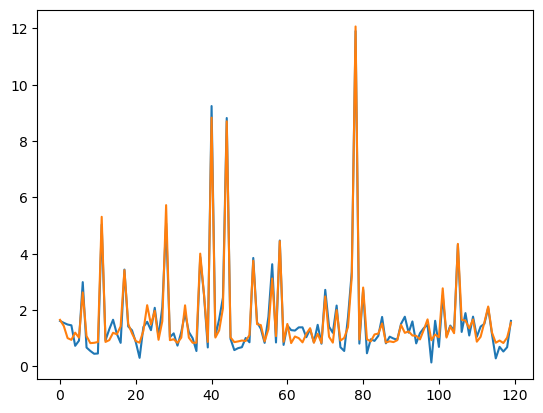

In [92]:
plt.plot(df['signal'])
plt.plot(res)

### №4

In [18]:
import numpy as np
import pandas as pd

np.random.seed(21)

n = 200

t = np.random.uniform(0, 10, n)

A = np.random.uniform(4, 8, n)        # амплитуда меняется
omega = np.random.uniform(1.5, 2.5, n)  # частота меняется

true_k = 0.38
true_C = 1.1

y = (
    A * np.exp(-true_k * t) * np.sin(omega * t)
    + true_C
    + np.random.normal(0, 0.25, size=n)
)

df = pd.DataFrame({
    "time": t,
    "A": A,
    "omega": omega,
    "signal": y
})



In [19]:
df

,time,A,omega,signal
0,0.487249,5.582966,2.237466,5.483536
1,2.891097,6.380876,2.491411,2.576248
2,7.209663,5.730693,2.344496,0.639224
3,0.216162,4.611479,2.249613,2.908809
4,2.059228,7.417983,1.906524,-1.212178
...,...,...,...,...
195,8.150634,7.366361,1.511985,0.864201
196,9.624530,4.637936,2.258466,1.240149
197,5.888824,6.949079,2.279619,1.744887
198,4.042521,5.673260,1.605256,1.160959


In [20]:
def model(x_data, k, C):
    A, t, w = x_data
    return A * np.e**(-k*t) * np.sin(w*t) + C

In [21]:
x_data = (df['A'].to_numpy(), df['time'].to_numpy(), df['omega'].to_numpy())

In [22]:
params, _ = curve_fit(model, x_data, df['signal'])

In [24]:
res = model(x_data, params[0], params[1])

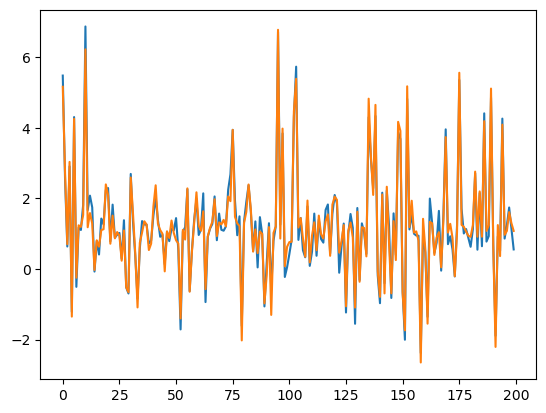

In [25]:
plt.plot(df['signal'])
plt.plot(res)
plt.show()

### №5

In [46]:
import numpy as np
import pandas as pd

np.random.seed(17)

n = 200

t = np.random.uniform(0, 10, n)
A = np.random.uniform(3, 8, n)
omega = np.random.uniform(1.2, 2.6, n)
phi = np.random.uniform(0, 2*np.pi, n)

# истинные (скрытые) параметры
true_k = 0.42
true_C = 1.05

y = (
    A * np.exp(-true_k * t) * np.sin(omega * t + phi)
    + true_C
    + np.random.normal(0, 0.25, size=n)
)

df = pd.DataFrame({
    "time": t,
    "A": A,
    "omega": omega,
    "phi": phi,
    "signal": y
})


In [48]:
df

,time,A,omega,phi,signal
0,2.946650,5.486535,1.412243,3.265687,2.669136
1,5.305868,7.490637,1.767435,0.310314,0.129093
2,1.915208,7.807634,1.384489,3.935925,1.947452
3,0.679004,3.011025,2.329877,5.625601,2.616928
4,7.869855,7.155509,1.814102,3.682200,1.153304
...,...,...,...,...,...
195,9.218051,3.139258,1.343003,2.589158,0.888545
196,7.212739,4.481325,2.021484,4.498323,1.310786
197,6.769230,7.540446,1.921816,2.653667,1.475250
198,9.868106,5.694715,2.162682,5.508667,1.504356


In [47]:
from scipy.optimize import curve_fit

In [61]:
def model(x_data, k, C):
    t, A, w, f = x_data
    return A * np.e**(-k*t) * np.sin(w*t + f) + C

In [62]:
x_data = (df['time'].to_numpy(), df['A'].to_numpy(), df['omega'].to_numpy(), df['phi'].to_numpy())

In [63]:
params, _ = curve_fit(model, x_data, df['signal'])

In [64]:
params[0], params[1]

(0.3978830870161741, 1.0364781970067756)

In [65]:
res = model(x_data, params[0], params[1])

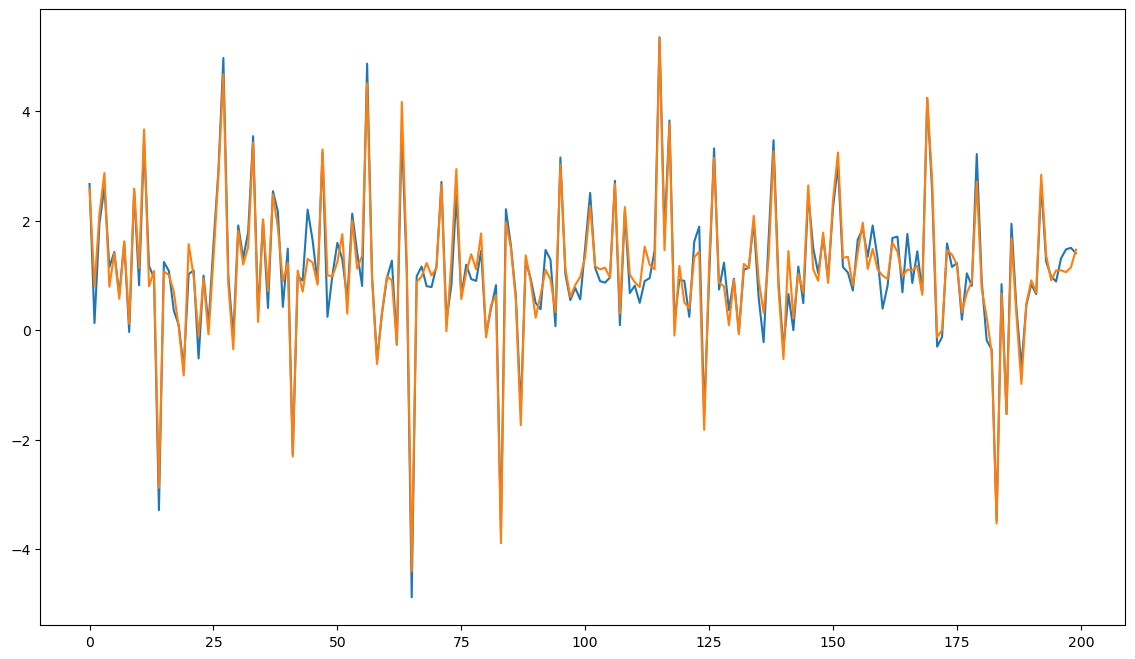

In [67]:
plt.figure(figsize=(14, 8))
plt.plot(df['signal'])
plt.plot(res)